
<div class="alert alert-block alert-info">
   <h2 align="center"> <center><b> Reinforcement Learning Assignment 3 - Q Learning </b></center></h2>

<br>
<center><font size="3">This notebook is a part of teaching material for ELEC-E8125</font></center>
<center><font size="3">Sep 4, 2024 - Nov 30, 2024</font></center>
<center><font size="3">Aalto University</font></center>
</div>


<a id='TOC'></a>

<div class="alert alert-block alert-success">
    
# Table of contents
* <a href='#1.'> 1. Introduction </a>
* <a href='#1.1'> 1.1 Learning Objectives </a>
* <a href='#1.2'> 1.2 Code Structure & Files </a>
* <a href='#2.'> 2. Cartpole </a>
* <a href='#2.'> 3. Lunar Lander </a> 
* <a href='#4.'> 4. Submitting </a>
* <a href='#4.1'> 4.1 Feedback </a>
* <a href='#5.'> References</a>

<a href='#T1'><b>Student Task 1.</b> Implementing Q-Learning  (25 points) </a>\
<a href='#T2'><b>Student Task 2.</b> Visualizing the Value Function (10 points) </a>\
<a href='#Q1'><b>Student Question 2.1</b> Analyzing the Value Function Heatmap (15 points) </a>\
<a href='#T3'><b>Student Task 3.</b> Investigating Initial Values (10 points) </a>\
<a href='#Q2'><b>Student Question 3.1</b> Analyzing Initial Values (5 points) </a>\
<a href='#Q3'><b>Student Question 3.2</b> Exploration (15 points) </a>\
<a href='#T4'><b>Student Task 4.</b> Using Q-Learning on the Lunar Lander Environment (5 points) </a>\
<a href='#Q4'><b>Student Question 4.1</b> Lunar Lander Performance (15 points) </a>

**Total Points:** 100

**Estimated runtime of all the cells:** 2 hour 

# 1. Introduction <a id='1.'></a>

In this exercise, you'll be applying grid-based Q-learning to the **Cartpole** and **LunarLander** environments.

## 1.1 Learning Objectives: <a id='1.1'></a>
- To understand and develop intuition about Q-learning.
- To understand simple exploration methods like GLIE and how exploration effects learning

## 1.2 Code Structure & Files <a id='1.2'></a>

You don’t have to edit any other file other than ```ex3.ipynb``` to complete this exercise.

```
├───cfg                           # Config files for environments e.g. define the maximum number of steps in an episode.
├───imgs                          # Images used in notebook
├───results
│   ├───CartPole-v1
│   │   └───video                  # Videos saved
│   │   │   logging.pkl            # Contains logged data
│   │   │   *q_table_e.pkl         # Contains qtable data for epsilon fixed
│   │   │   *q_table_glie.pkl      # Contains qtable data for glie
│   │   │   *e.png                 # Contains training performance plot for epsilon fixed
│   │   │   *glie.png              # Contains training performance plot for glie
│   ├───LunarLander-v2
│   │   └───video
│   │   │   logging.pkl
│   │   │   *q_table_e.pkl
│   │   │   *q_table_glie.pkl
│   │   │   *e.png                 
│   │   │   *glie.png              
│   ex3.ipynb                      # Main assignment file containing tasks <---------
│   setup.py                       # Contains setup function
│   utils.py                       # Contains useful functions 
```


## Warnings:

- Don’t copy and paste cells within a notebook. This will mess up the tracking metadata and prevent autograding from working.
- Only add new cells using the '+' button in the upper toolbar and do not split cells.
- Be cautious about things such as copying the whole notebook to Colab to work on it. This has sometimes resulted in removing all notebook metadata, making autograding impossible.

# 2. Cartpole <a id='2.'></a>

Recall the Cartpole environment from Exercise 1.


<a id='T1'></a>
<div class=" alert alert-warning">
    <h3><b>Student Task 1.</b> Implementing Q-Learning  (25 points) </h3> 

Implement Q-learning as presented in [Sutton and Barto, 2017, Section 6.5][1] for the Cartpole environment. Once you've successfully implemented the `get_action` and `update_q_value` functions,
you can compare the two exploration methods:

1. Use a constant value of $\epsilon = 0.1$:
    
- Training:
    ```python
    # Training with constant epsilon 0.1
    cfg_args = dict(epsilon=0.1, save_video=False)
    train(cfg_path=Path().cwd()/'cfg'/'cartpole_v1.yaml', cfg_args=cfg_args)
    ```
- Testing:
    ```python
    # Testing with constant epsilon 0.1
    cfg_args=dict(epsilon=0.1, save_video=True)
    test(cfg_path=Path().cwd()/'cfg'/'cartpole_v1.yaml', cfg_args=cfg_args)
    ```
- Visualization: To record and visualize the agent's performance, you could set `save_video=True` and run the following:

    ```python
    Video(Path().cwd()/'results'/'CartPole-v1'/'video'/'test'/'ex3-episode-0.mp4', embed=True, html_attributes="loop autoplay")
    ```

2. Implement **GLIE** (i.e., *Greedy in the Limit with Infinite Exploration*), which reduces the value of $\epsilon$ over time. For details on the formula, refer to **[Lecture 3]**.
    
- Training (Ensure you've determined the correct value for `glie_b`):  
    ```python
    # Training with GLIE
    cfg_args=dict(epsilon='glie', glie_b=<insert-correct-value>, save_video=False) # insert correct value for glie_b
    train(cfg_path=Path().cwd()/'cfg'/'cartpole_v1.yaml', cfg_args=cfg_args) # < 30 mins
    ```
- Testing:
 
    ```python
    # Testing with GLIE
    cfg_args=dict(epsilon='glie', save_video=True)
    test(cfg_path=Path().cwd()/'cfg'/'cartpole_v1.yaml', cfg_args=cfg_args)
    ```
- Visualization: To record and visualize the agent's performance, you could set `save_video=True` and run the following:

    ```python
    Video(Path().cwd()/'results'/'CartPole-v1'/'video'/'test'/'ex3-episode-0.mp4', embed=True, html_attributes="loop autoplay")
    ```
    
These videos will be stored in the **results** folder.

**Note:** Before you proceed with the "Training with GLIE" method, ensure you have completed the "Training with a constant epsilon" steps. Since the video save path is the same, the results will be overwritten.

---

**Please attach the following files to your submission:**

- Training performance plots:
  - `task1_e.png`: This file represents the episode versus the smoothed episodic reward for the constant exploration rate.
  - `task1_glie.png`: This file represents the episode versus the smoothed episodic reward for GLIE.

- Q-table files:
  - `task1_q_table_e.pkl`: Q-table for the constant exploration rate.
  - `task1_q_table_glie.pkl`: Q-table for GLIE.

Ensure all files are correctly named and included.


<figure style="text-align: center">
<img src="imgs/ep_reward.png" width="600px">
<figcaption style="text-align: center"> Figure 1: The training performance plot should look similar to the one presented here when using GLIE  </figcaption>
</figure>

### References
[1]: http://incompleteideas.net/book/RLbook2018.pdf
[Sutton and Barto, 2017]: Sutton, Richard S., and Andrew G. Barto. "Reinforcement Learning: An Introduction (in progress)." London, England (2017).
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>



In [1]:
skip_training = False  # Set this flag to True before validation and submission

In [2]:
# --- Standard Libraries ---
from pathlib import Path
from collections import deque
import warnings
import os

# --- Third-party Libraries ---
import numpy as np  # Fundamental package for scientific computing
from IPython.display import Video  # For displaying videos in the notebook
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# --- Custom Modules ---
from setup import setup  # Setup functions for training
import utils as u  # Helper functions for the notebook

# --- Configurations ---
# Set working directory to 'results'
work_dir = Path().cwd() / 'results'

# Suppress DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
def init_q_table(observation_space, action_dim, discr, bool_position=None, init_q=0.):
    """
    Initialize a Q-table for the given observation space and actions.
    
    Parameters:
    - observation_space: The state space of the environment.
    - action_dim: The number of possible actions.
    - discr: The number of divisions for discretization.
    - bool_position: Indexes where the observation space has boolean values.
    - init_q: Initial value for the Q-table.
    
    Returns:
    - axis: A list of numpy arrays representing the discrete states. 
            Each array's length corresponds to either 'discr' or 2 (for boolean values).
    - q_table: The initialized Q-table. Its shape is determined by [*axis dimensions, action_dim].
               For example, if the axis dimensions were [10, 10] and action_dim was 3, 
               the q_table shape would be [10, 10, 3].
    """
    high_values = observation_space.high
    low_values = observation_space.low
    axis = []
    for idx, (low_val, high_val) in enumerate(zip(low_values, high_values)):
        # here to avoid inf boundary, we truncate the value to [-4, 4] 
        if low_val < -1e10: low_val = -4
        if high_val > 1e10: high_val = 4
        
        if (bool_position is not None) and (idx in bool_position):
            axis.append(np.linspace(low_val, high_val, 2, dtype=np.float32)) # for boolean, we only have two values: 1., 0.
        else:
            axis.append(np.linspace(low_val, high_val, discr, dtype=np.float32))
    _shape = [ax.shape[0] for ax in axis] + [action_dim]
    q_table = np.zeros(_shape) + init_q
    return axis, q_table

def get_table_idx(state, axis):
    """
    Give a state, discretize it, and return the index in each dimension (axis). 
    With the returned index, you can access q(s,.) with q_table[idx].
    
    Parameters:
    - state: The state to be discretized. 
    - axis: The discrete state space as a list of numpy arrays. 
    
    Returns:
    - idx: A tuple representing the index of the discretized state in the Q-table. 
           Its shape matches the dimensions of the provided 'axis'.
    """
    def _get_ax_idx(ax, value):
        return np.argmin(np.abs(ax - value))
    return tuple([_get_ax_idx(ax, value) for ax, value in zip(axis, state)])

In [4]:
def get_action(state, q_axis, q_table, epsilon=0.0):
    """
    Determine the action to take based on epsilon-greedy strategy.
    
    Parameters:
    - state: The current state of the agent.
    - q_axis: The discrete state space as a list of numpy arrays.
    - q_table: The Q-table with learned values.
    - epsilon: The probability with which a random action is taken (exploration). 
               Default is 0 (purely greedy).
    
    Returns:
    - action: The chosen action, either greedily or randomly based on epsilon.
    """
    # if epsilon == 0.0, the policy will be greedy -- always choose the best action
    '''
    # TODO: Task 1, implement epsilon-greedy
    # 1. Discretize the given state by using the get_table_idx(state, axis) function
    # 2. Use the discretized state's index to access the Q-table
    # 3. Generate a random number between 0 and 1.
    # 4. Compare this number to `epsilon`
    # 5. If the random number is less than `epsilon`, choose a random action.
    # 6. Otherwise, choose the best action (greedy action)
    '''
    ########## Your code starts here ##########
    
    discrete_state = get_table_idx(state, q_axis)
    action_values = q_table[discrete_state]
    
    action = np.argmax(action_values)
    
    if np.random.rand() < epsilon:
        # Get actions
        actions = np.arange(action_values.size)
        # Remove the best action
        actions = np.delete(actions, action)
        # Pick random action
        action = np.random.choice(actions)
    
    ########## Your code ends here #########
    return action


def update_q_value(old_state, action, new_state, gamma, reward, done, alpha, q_axis, q_table):
    """
    Update the Q-value for a state-action pair based on the Q-learning update rule.
    
    Parameters:
    - old_state: The original state before taking the action.
    - action: The action taken.
    - new_state: The state after taking the action.
    - gamma: Discount factor.
    - reward: Immediate reward for taking the action.
    - done: Boolean indicating if the episode is done.
    - alpha: Learning rate.
    - q_axis: The discrete state space as a list of numpy arrays.
    - q_table: The Q-table with learned values.
    
    Returns:
    - q_table: Updated Q-table.
    """

    # q_table contains discretized state-action space (16, 16, 16, 16, 2) values
    # Each observation is discritized 16 times and the last dimension are the two
    # actions that can be taken. 
    '''
    # TODO: Task 1, update q value
    # 1. Retrieve Old Q-Value
    # 2. Determine the Next Action
    # 3. Retrieve New Q-Value
    #     If the episode isn't done, get the Q-value for the new_state and next_action.
    #     If the episode is done, set the new Q-value to zero.
    # 4. Compute the Updated Q-Value
    # 5. Update the Q-Table 
    # 6. Return the Updated Q-Table
    '''
    old_table_idx = get_table_idx(old_state, q_axis) # idx of q(s_old, *)
    new_table_idx = get_table_idx(new_state, q_axis) # idx of q(s_new, *)  
    ########## Your code starts here ########## 
    
    old_v = q_table[old_table_idx][action]
    next_action = get_action(new_state, q_axis, q_table)
    #new_v = q_table[new_table_idx][next_action]
    
    if done:
        new_v = 0
    else:
        new_v = q_table[new_table_idx][next_action]
    
    new_value = old_v + alpha * (reward + gamma * new_v - old_v)    
    q_table[old_table_idx][action] = new_value
    
    ########### Your code ends here ########## 
    return q_table

In [5]:
# test the get_action function 

def test_get_action():
    test_state = [1,0]
    test_qaxis = np.array([-4.,3.]), np.array([-4. ,-6. ])

    test_qtable = np.array([[[0.49364422, 0.83209827],[0.987027,  0.48691833]],[[0.40560464, 0.26888288],[0.90825581, 0.88758134]]])
    assert get_action(test_state, test_qaxis, test_qtable, epsilon=0) == 0
    test_qtable = np.array([[[0.49364422, 0.83209827],[0.987027,  0.48691833]],[[-0.40560464, 0.26888288],[0.90825581, 0.88758134]]])
    assert get_action(test_state, test_qaxis, test_qtable, epsilon=0) == 1


# test update_q_value function
def test_update_q_value():
    test_state = [1,0]
    test_qaxis = np.array([-4.,3.]), np.array([-4. ,-6. ])
    test_qtable = np.array([[[0.49364422, 0.83209827],[0.987027,  0.48691833]],[[-0.40560464, 0.26888288],[0.90825581, 0.88758134]]])
    new_test_state = [0,1]
    reward = 1
    gamma = 0.9
    done = False
    action = 0
    alpha = 1
    updated_q_value = update_q_value(test_state, action, new_test_state, gamma, reward, done, alpha, test_qaxis, test_qtable)
    assert np.allclose(updated_q_value, np.array([[[0.49364422, 0.83209827],[0.987027  , 0.48691833]],[[1.24199459, 0.26888288],[0.90825581, 0.88758134]]]), 0.001)

test_get_action()
test_update_q_value()

In [6]:
def plot_training_data(training_data, save_path):
    df = pd.DataFrame(training_data)
    plt.figure(figsize=(5, 3.5))
    sns.lineplot(data=df, x='episode', y='ep_reward_avg')
    plt.title('Training Performance')
    plt.savefig(save_path)
    plt.show()

def train(cfg_path, cfg_args={}):
    env, cfg = setup(cfg_path, cfg_args=cfg_args)
    performance_data = []

    # init q_table with zeros
    q_axis, q_table = init_q_table(env.observation_space, 
        env.action_space.n, cfg.discr, bool_position=cfg.bool_position, init_q=cfg.initial_q)

    # begin training and testing
    ep_reward_deque = deque([], maxlen=500)  # used to calculate the smoothed (avg over recent 500 episodes) ep_reward
    for ep in range(cfg.train_episodes + 1):
        # set epsilon value
        if cfg.epsilon == 'glie':
            epsilon = cfg.glie_b / (cfg.glie_b + ep)  
        elif isinstance(cfg.epsilon, (int, float)):
            epsilon = cfg.epsilon
        else: 
            raise ValueError
        
        (state, _), done, ep_reward, timesteps = env.reset(), False, 0, 0
        while not done:
            action = get_action(state, q_axis, q_table, epsilon=epsilon) 
            new_state, reward, done, _, _ = env.step(action)
            q_table = update_q_value(state, action, new_state, cfg.gamma, reward, done, cfg.alpha,
                                        q_axis, q_table)
    
            state = new_state
            ep_reward += reward
            timesteps += 1
            if timesteps >= env.spec.max_episode_steps:
                done = True
                
        ep_reward_deque.append(ep_reward)
        info = {
            'episode': ep,
            'epsilon': epsilon,
            'ep_reward': ep_reward,
            'timesteps': timesteps,
            'ep_reward_avg': np.mean(list(ep_reward_deque))
        }

        performance_data.append(info)
        

        if (not cfg.silent) and (ep % 500 == 0): print(info)
    
    work_dir = Path().cwd()/'results'/f'{cfg.env_name}'
      
    # save the q-value table and q_axis
    file_pre = f"{cfg.task_no}_" if hasattr(cfg, 'task_no') else ""
    file = file_pre + 'q_table_glie.pkl' if cfg.epsilon == 'glie' else file_pre + 'q_table_e.pkl'
    u.save_object({'q_table': q_table, 'axis': q_axis},
                        work_dir/file)
    png_file = file_pre + '_glie.png' if cfg.epsilon == 'glie' else file_pre + '_e.png'
    plot_training_data(performance_data, work_dir/png_file)
    print('Training done!')

    
def test(cfg_path, cfg_args={'testing':True}):
    
    cfg_args.update({'testing':True})
    env, cfg = setup(cfg_path, cfg_args=cfg_args)
    
    work_dir = Path().cwd()/'results'/f'{cfg.env_name}'
    
    # load q_table
    file_pre = f"{cfg.task_no}_" if hasattr(cfg, 'task_no') else ""
    file = file_pre + 'q_table_glie.pkl' if cfg.epsilon == 'glie' else file_pre + 'q_table_e.pkl'
    data = u.load_object(work_dir/file)
    q_axis, q_table = data['axis'], data['q_table']

    # begin testing
    for ep in range(cfg.test_episodes):
        (state, _), done, ep_reward, timesteps = env.reset(), False, 0, 0
        while not done:
            action = get_action(state, q_axis, q_table, epsilon=0.0) # be greedy during testing
            new_state, reward, done, _, _ = env.step(action)

            state = new_state
            ep_reward += reward
            timesteps += 1
        
        info = {
            'test_episode': ep,
            'test_ep_reward': ep_reward,
            'timesteps': timesteps,
        }

        if not cfg.silent: print(info)
    
    print('Testing done!')



Numpy/Torch/Random Seed:  408
{'episode': 0, 'epsilon': 0.1, 'ep_reward': 10.0, 'timesteps': 10, 'ep_reward_avg': 10.0}
{'episode': 500, 'epsilon': 0.1, 'ep_reward': 12.0, 'timesteps': 12, 'ep_reward_avg': 10.976}
{'episode': 1000, 'epsilon': 0.1, 'ep_reward': 23.0, 'timesteps': 23, 'ep_reward_avg': 16.028}
{'episode': 1500, 'epsilon': 0.1, 'ep_reward': 42.0, 'timesteps': 42, 'ep_reward_avg': 69.498}
{'episode': 2000, 'epsilon': 0.1, 'ep_reward': 51.0, 'timesteps': 51, 'ep_reward_avg': 123.338}
{'episode': 2500, 'epsilon': 0.1, 'ep_reward': 231.0, 'timesteps': 231, 'ep_reward_avg': 178.048}
{'episode': 3000, 'epsilon': 0.1, 'ep_reward': 124.0, 'timesteps': 124, 'ep_reward_avg': 203.48}
{'episode': 3500, 'epsilon': 0.1, 'ep_reward': 264.0, 'timesteps': 264, 'ep_reward_avg': 200.752}
{'episode': 4000, 'epsilon': 0.1, 'ep_reward': 122.0, 'timesteps': 122, 'ep_reward_avg': 204.77}
{'episode': 4500, 'epsilon': 0.1, 'ep_reward': 500.0, 'timesteps': 500, 'ep_reward_avg': 218.06}
{'episode': 5

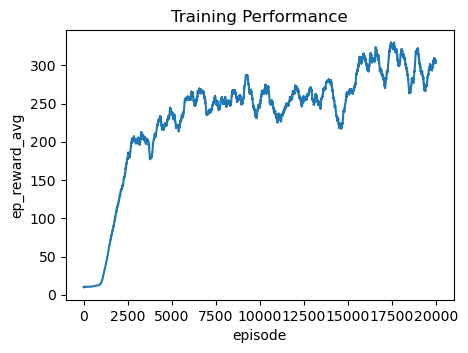

Training done!


In [7]:
# Training with constant epsilon 0.1
if not skip_training:
    cfg_args=dict(epsilon=0.1, save_video=False)
    train(cfg_path=Path().cwd()/'cfg'/'cartpole_v1.yaml', cfg_args=cfg_args) # < 30 mins

![plot_e](./results/CartPole-v1/task1__e.png)

In [8]:
# Testing with constant epsilon 0.1
if not skip_training:
    cfg_args=dict(epsilon=0.1, save_video=True)
    test(cfg_path=Path().cwd()/'cfg'/'cartpole_v1.yaml', cfg_args=cfg_args)

Numpy/Torch/Random Seed:  408


/opt/software/lib/python3.10/site-packages/gymnasium/wrappers/record_video.py:87: UserWarning: WARN: Overwriting existing videos at /notebooks/rl2024/ex3/results/CartPole-v1/video/test folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


{'test_episode': 0, 'test_ep_reward': 549.0, 'timesteps': 549}
{'test_episode': 1, 'test_ep_reward': 557.0, 'timesteps': 557}
{'test_episode': 2, 'test_ep_reward': 514.0, 'timesteps': 514}
{'test_episode': 3, 'test_ep_reward': 1417.0, 'timesteps': 1417}
{'test_episode': 4, 'test_ep_reward': 1078.0, 'timesteps': 1078}
{'test_episode': 5, 'test_ep_reward': 400.0, 'timesteps': 400}
{'test_episode': 6, 'test_ep_reward': 743.0, 'timesteps': 743}
{'test_episode': 7, 'test_ep_reward': 372.0, 'timesteps': 372}
{'test_episode': 8, 'test_ep_reward': 498.0, 'timesteps': 498}
{'test_episode': 9, 'test_ep_reward': 379.0, 'timesteps': 379}
Testing done!


To visualize how the agent acts within the environment, execute the cell below. **Modify the path** to select the episode you'd like to observe. Remember, by default, videos are saved every 500 episodes during training.

In [9]:
# Visualizing the results with constant epsilon 0.1
if not skip_training:
      video = Video(Path().cwd()/'results'/'CartPole-v1'/'video'/'test'/'ex3-episode-3.mp4',
      embed=True, html_attributes="loop autoplay") # Set html_attributes="controls" for video control
      display(video)


**Important Reminder:** Before initiating the "Training with GLIE" process, make sure you've fully executed the steps under "Training with a constant epsilon". Be cautious, as the video save path remains identical; thus, any previous results will be overwritten.


Numpy/Torch/Random Seed:  408
{'episode': 0, 'epsilon': 1.0, 'ep_reward': 11.0, 'timesteps': 11, 'ep_reward_avg': 11.0}
{'episode': 500, 'epsilon': 0.8163115356355621, 'ep_reward': 11.0, 'timesteps': 11, 'ep_reward_avg': 18.342}
{'episode': 1000, 'epsilon': 0.6896337678460583, 'ep_reward': 24.0, 'timesteps': 24, 'ep_reward_avg': 15.786}
{'episode': 1500, 'epsilon': 0.5969908651262762, 'ep_reward': 14.0, 'timesteps': 14, 'ep_reward_avg': 16.89}
{'episode': 2000, 'epsilon': 0.5262908574135481, 'ep_reward': 10.0, 'timesteps': 10, 'ep_reward_avg': 18.876}
{'episode': 2500, 'epsilon': 0.470563320626853, 'ep_reward': 40.0, 'timesteps': 40, 'ep_reward_avg': 23.686}
{'episode': 3000, 'epsilon': 0.42550746840291076, 'ep_reward': 45.0, 'timesteps': 45, 'ep_reward_avg': 27.124}
{'episode': 3500, 'epsilon': 0.388325760223698, 'ep_reward': 19.0, 'timesteps': 19, 'ep_reward_avg': 31.088}
{'episode': 4000, 'epsilon': 0.3571198971391835, 'ep_reward': 23.0, 'timesteps': 23, 'ep_reward_avg': 39.392}
{'e

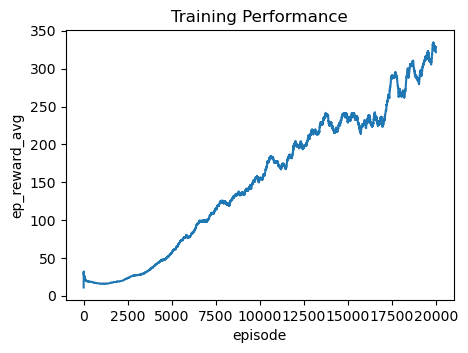

Training done!


In [10]:
b = 2222

# Training with GLIE
if not skip_training:
    cfg_args=dict(epsilon='glie', glie_b=b, save_video=False) # insert correct value for glie_b
    train(cfg_path=Path().cwd()/'cfg'/'cartpole_v1.yaml', cfg_args=cfg_args) # < 30 mins

![plot_glie](./results/CartPole-v1/task1__glie.png)

In [11]:
# Testing with GLIE
if not skip_training:
    cfg_args=dict(epsilon='glie', save_video=True)
    test(cfg_path=Path().cwd()/'cfg'/'cartpole_v1.yaml', cfg_args=cfg_args)

Numpy/Torch/Random Seed:  408


/opt/software/lib/python3.10/site-packages/gymnasium/wrappers/record_video.py:87: UserWarning: WARN: Overwriting existing videos at /notebooks/rl2024/ex3/results/CartPole-v1/video/test folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


{'test_episode': 0, 'test_ep_reward': 176.0, 'timesteps': 176}
{'test_episode': 1, 'test_ep_reward': 199.0, 'timesteps': 199}
{'test_episode': 2, 'test_ep_reward': 147.0, 'timesteps': 147}
{'test_episode': 3, 'test_ep_reward': 201.0, 'timesteps': 201}
{'test_episode': 4, 'test_ep_reward': 172.0, 'timesteps': 172}
{'test_episode': 5, 'test_ep_reward': 168.0, 'timesteps': 168}
{'test_episode': 6, 'test_ep_reward': 174.0, 'timesteps': 174}
{'test_episode': 7, 'test_ep_reward': 138.0, 'timesteps': 138}
{'test_episode': 8, 'test_ep_reward': 335.0, 'timesteps': 335}
{'test_episode': 9, 'test_ep_reward': 167.0, 'timesteps': 167}
Testing done!


Just as in the "visualize the results with constant epsilon 0.1" section, **modify the path** to select the episode you'd like to observe. Remember, videos are saved every 500 episodes during training.

In [12]:
# Visualizing the results with GLIE
if not skip_training:
      video = Video(Path().cwd()/'results'/'CartPole-v1'/'video'/'test'/'ex3-episode-0.mp4',
      embed=True, html_attributes="loop autoplay") # Set html_attributes="controls" for video control
      display(video)

<a id='T2'></a>
<div class=" alert alert-warning">
    <h3><b>Student Task 2.</b> Visualizing the Value Function (10 points) </h3> 

Use your Q-function values estimated with GLIE to calculate the optimal value function of each state. Complete the ```display_heatmap_vf()``` function below to plot the heatmap of the value function in terms of $x$ and $\theta$, such that $\theta$ is on horizontal and $x$ is on vertical axis. For plotting, average the values over $\dot{x}$ and $\dot{\theta}$. Attach the heatmap in your report.

**Hint:** For plotting the heatmap you can use Matplotlib-pyplot: ```pyplot.imshow(values_array)``` or Seaborn: ```seaborn.heatmap(values_array)```
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


In [13]:
# --- Standard Libraries ---
from pathlib import Path    # For handling filesystem paths in a more intuitive way

# --- Third-party Libraries ---
import matplotlib.pyplot as plt  # For creating static, interactive, and animated visualizations
import seaborn as sns            # A data visualization library based on matplotlib

In [14]:
def display_heatmap_vf(env_name="CartPole-v1", q_table_name='task1_q_table_glie.pkl'):
    """
    Displays a heatmap of the value function for a given environment and Q-table.

    Input:
    - env_name (str): Name of the environment, default is "CartPole-v1".
    - q_table_name (str): Name of the saved Q-table file, default is 'q_table_glie.pkl'.

    Output:
    - Visual display of the heatmap.

    """
    
    # load the Q-value array
    work_dir = Path().cwd()/'results'/f'{env_name}'
    
    data = u.load_object(work_dir/q_table_name) # load q_table 
    q_axis, q_table = data['axis'], data['q_table'] 
    x_axis, th_axis = q_axis[0], q_axis[2]  # get the axis for x and \theta

    discr = q_table.shape[0] # get the number of discretized bins for a state variable in the Q-table
    '''
    # TODO: Task 2 Plot the heatmap of the value function
    # 1. Compute the maximum Q-value for each state, which gives the value function of that state
    # 2. Uses Seaborn and Matplotlib to display the heatmap.  
    '''
    
    ########## Your code begins here. ##########
    
    table = np.zeros((discr, discr))
    
    for x in x_axis:
        for th in th_axis:
            idx = get_table_idx([x, th], (x_axis, th_axis))
            table[idx] = np.max(q_table[idx])
            
    x_ticks = [ '%.2f' % elem for elem in x_axis ]
    y_ticks = [ '%.2f' % elem for elem in th_axis ]
            
    plot = sns.heatmap(table, xticklabels=x_ticks, yticklabels=y_ticks)
    plot.set_xlabel('x', fontsize=10)
    plot.set_ylabel('theta', fontsize=10)
    plot.set_title("Maximum state-values")
    
    ########## Your code ends here. ##########

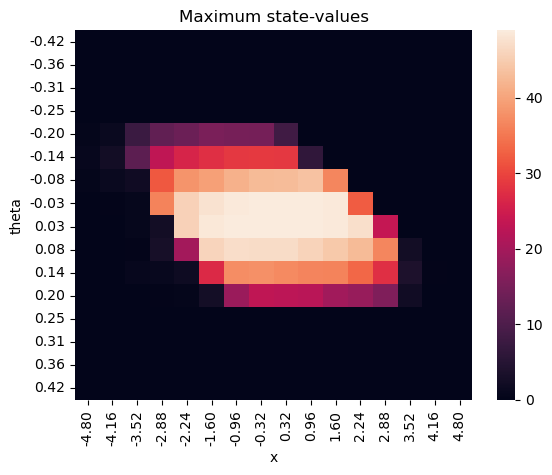

In [15]:
# Visual display of the heatmap of the value function
if not skip_training:
    display_heatmap_vf()

Do not remove this cell as it is used for grading

<a id='Q1'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 2.1</b> Analyzing the Value Function Heatmap (15 points) </h3> 

What do you think the heatmap of the Q-values would have looked like at different stages of training? Select all accurate description for each stage.

    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


Options

1. Before training, the heatmap is all zeros (assuming Q-values are initialized as zeros)
2. Before training, the heatmap has random values between -1 and 1
3. After a single episode, the Q-values of visited states are updated with non-zero values
4. After a single episode, there is a horizontal line in the middle of the heatmap
5. After a single episode, the heatmap shows a vertical line in the middle of the heatmap
6. Halfway through training, the heatmap already looks quite similar to the final optimal heatmap
7. Halfway through training, the heatmap looks quite similar to the heatmap of after a single episode
8. The cart's limited movement in the x direction and the pole's fall create a distinct pattern after one episode
9. Random exploration in the first episode leads to scattered non-zero values throughout the heatmap

In [16]:
# Answer question 2.1 with appropriate option numbers
sq2_1 = [1, 3, 6, 8]

The following cells are used for grading.

<a id='T3'></a>
<div class=" alert alert-warning">
    <h3><b>Student Task 3.</b> Investigating Initial Values (10 points) </h3> 

Set $\epsilon$ to zero, effectively making the policy greedy w.r.t. current Q-value estimates. Run the training again while
1) keeping the initial estimates of the Q function at 0,
2) setting the initial estimates of the Q function to 50 for all states and actions.

You can change the initial Q value estimates by passing ```initial_q=<value>``` in the following cells. 

**Attach training performance plots of both initializations in your report.**

🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


Numpy/Torch/Random Seed:  408
{'episode': 0, 'epsilon': 0, 'ep_reward': 10.0, 'timesteps': 10, 'ep_reward_avg': 10.0}
{'episode': 500, 'epsilon': 0, 'ep_reward': 9.0, 'timesteps': 9, 'ep_reward_avg': 9.344}
{'episode': 1000, 'epsilon': 0, 'ep_reward': 10.0, 'timesteps': 10, 'ep_reward_avg': 9.336}
{'episode': 1500, 'epsilon': 0, 'ep_reward': 11.0, 'timesteps': 11, 'ep_reward_avg': 9.332}
{'episode': 2000, 'epsilon': 0, 'ep_reward': 8.0, 'timesteps': 8, 'ep_reward_avg': 9.328}
{'episode': 2500, 'epsilon': 0, 'ep_reward': 10.0, 'timesteps': 10, 'ep_reward_avg': 9.366}
{'episode': 3000, 'epsilon': 0, 'ep_reward': 10.0, 'timesteps': 10, 'ep_reward_avg': 9.352}
{'episode': 3500, 'epsilon': 0, 'ep_reward': 10.0, 'timesteps': 10, 'ep_reward_avg': 9.278}
{'episode': 4000, 'epsilon': 0, 'ep_reward': 10.0, 'timesteps': 10, 'ep_reward_avg': 9.362}
{'episode': 4500, 'epsilon': 0, 'ep_reward': 10.0, 'timesteps': 10, 'ep_reward_avg': 9.376}
{'episode': 5000, 'epsilon': 0, 'ep_reward': 8.0, 'timestep

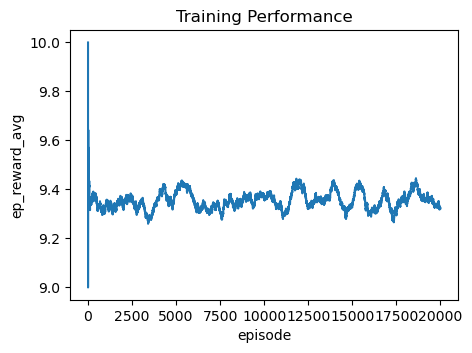

Training done!


In [17]:
# Initialize the Q function with a value of 0 and begin training
if not skip_training:
    cfg_args=dict(epsilon=0, initial_q=0, task_no='task3.1') # set the initial estimates of the Q function to 0
    train(cfg_path=Path().cwd()/'cfg'/'cartpole_v1.yaml', cfg_args=cfg_args)

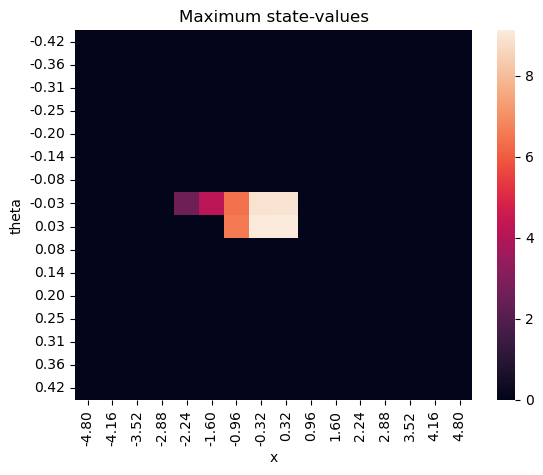

In [18]:
# Visual display of the heatmap of the value function
if not skip_training:
    display_heatmap_vf('CartPole-v1', 'task3.1_q_table_e.pkl')

Numpy/Torch/Random Seed:  408
{'episode': 0, 'epsilon': 0, 'ep_reward': 8.0, 'timesteps': 8, 'ep_reward_avg': 8.0}
{'episode': 500, 'epsilon': 0, 'ep_reward': 96.0, 'timesteps': 96, 'ep_reward_avg': 232.384}
{'episode': 1000, 'epsilon': 0, 'ep_reward': 272.0, 'timesteps': 272, 'ep_reward_avg': 224.228}
{'episode': 1500, 'epsilon': 0, 'ep_reward': 202.0, 'timesteps': 202, 'ep_reward_avg': 222.264}
{'episode': 2000, 'epsilon': 0, 'ep_reward': 282.0, 'timesteps': 282, 'ep_reward_avg': 305.522}
{'episode': 2500, 'epsilon': 0, 'ep_reward': 500.0, 'timesteps': 500, 'ep_reward_avg': 439.388}
{'episode': 3000, 'epsilon': 0, 'ep_reward': 279.0, 'timesteps': 279, 'ep_reward_avg': 413.62}
{'episode': 3500, 'epsilon': 0, 'ep_reward': 408.0, 'timesteps': 408, 'ep_reward_avg': 396.762}
{'episode': 4000, 'epsilon': 0, 'ep_reward': 500.0, 'timesteps': 500, 'ep_reward_avg': 405.23}
{'episode': 4500, 'epsilon': 0, 'ep_reward': 500.0, 'timesteps': 500, 'ep_reward_avg': 477.496}
{'episode': 5000, 'epsilon

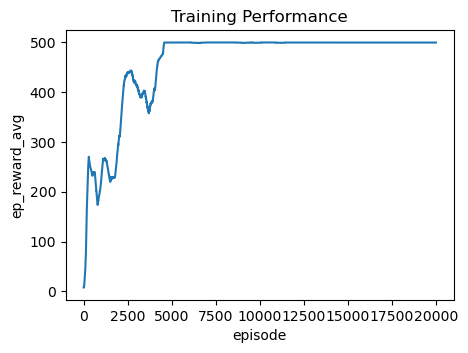

Training done!


In [19]:
# Initialize the Q function with a value of 50 and begin training
if not skip_training:
    cfg_args=dict(epsilon=0, initial_q=50,task_no='task3.2') # set the initial estimates of the Q function to 50
    train(cfg_path=Path().cwd()/'cfg'/'cartpole_v1.yaml', cfg_args=cfg_args)

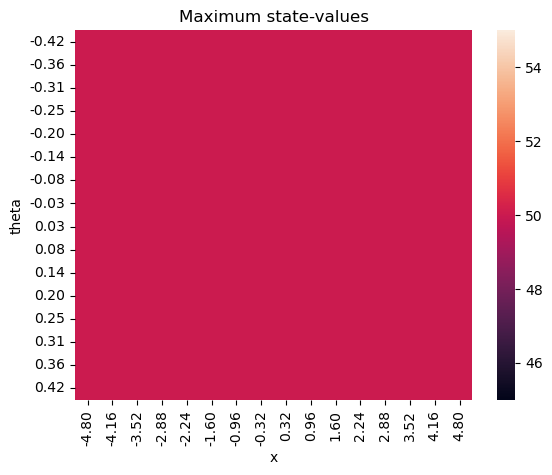

In [20]:
# Visual display of the heatmap of the value function
if not skip_training:
    display_heatmap_vf('CartPole-v1', 'task3.2_q_table_e.pkl')

Based on the results you observed in Task 3, answer the following questions:

<a id='Q2'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 3.1</b> Analyzing Initial Values (5 points) </h3> 

In which case does the model perform better?
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


Options
1. The model performs better with initial Q-values of 0
2. The model performs better with initial Q-values of 50

In [21]:
# Answer question 3.1 with appropriate option number
sq3_1 = 2

The following cells are used for grading.

<a id='Q3'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 3.2</b> Exploration (15 points) </h3> 

Why is this the case, and how does the initialization of Q values affect exploration?
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


Options

1. Higher initial Q-values encourage exploration by making unexplored actions seem more attractive.
2. Q-values of 0 make the agent indifferent to all actions initially, leading to diverse exploration.
3. Initializing Q-values to 50 creates an "optimistic" prior that encourages trying new actions.
4. Q-values of 0 promote exploration because the agent needs to try all actions to differentiate their values.
5. Higher initial Q-values allow the agent to overcome local optima more easily.
6. Initializing to 0 encourages exploration as the agent is more willing to try actions with unknown outcomes.
7. Q-values of 0 cause the agent to be overly cautious, avoiding potentially risky but rewarding actions.
8. Higher initial Q-values compensate for the lack of explicit exploration in a greedy policy.
9. Initializing to 0 promotes a "blank slate" approach, allowing the agent to explore without bias.
10. With Q-values initialized to 0, the agent tends to stick with the first action it tries due to non-negative rewards.



In [22]:
# Answer question 3.2 with appropriate option numbers
sq3_2 = [1, 3, 5, 8]

The following cells are used for grading.

# 3. Lunar lander <a id='3.'></a>

<figure style="text-align: center">
<img src="imgs/lunar_lander.png" width="600px">
<figcaption style="text-align: center"> Figure 2: The Lunar lander environment. </figcaption>
</figure>

The ***Lunar lander*** environment is shown in Figure 2. The goal is to make the lunar lander land on the ground between two flag poles. The agent receives a positive reward for moving towards the landing pad, landing, etc. A negative reward is given for firing the main engine (more fuel-efficient policies are better) and for crashing. Four actions are available: firing the left/right/main engines, or doing nothing (free fall). The observation vector consists of 6 continuous and 2 discrete values:

$$
o=\left(\begin{array}{llllllll}
x & y & \dot{x} & \dot{y} & \theta & \dot{\theta} & c_l & c_r
\end{array}\right)^T,
$$

where $x$ and $y$ are the coordinates of the lander, $\dot{x}$ and $\dot{y}$ its velocities, $\theta$ represents the rotation angle and $\dot{\theta}$ the angular velocity of the lander. Two discrete values $c_l$ and $c_r$  indicate whether the lander’s legs are in contact with the ground (0 or 1).


<a id='T4'></a>
<div class=" alert alert-warning">
    <h3><b>Student Task 4.</b> Using Q-Learning on the Lunar Lander Environment (5 points) </h3> 

Run the training for Lunar Lander environment by executing cell ```Training on the Lunar Lander Environment```. Run it for 20000 episodes (which was enough for the Cartpole to learn). **Attach the training performance plot in your submission.**

**Heads Up:** The generated file `task4_q_table.pkl` is sizeable, approximately 2 GB. Ensure you **delete** it before submitting. But do not delete the `task4__glie.png` file.
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


In [23]:
# Training on the Lunar Lander Environment
if not skip_training:
    cfg_args=dict(epsilon='glie', glie_b=b, save_video=False, discr=12) # insert correct value for glie_b
    train(cfg_path=Path().cwd()/'cfg'/'lunarlander_v2.yaml', cfg_args=cfg_args) # 

In [24]:
if not skip_training:
    cfg_args=dict(epsilon='glie', save_video=True, test_episodes=5)
    test(cfg_path=Path().cwd()/'cfg'/'lunarlander_v2.yaml', cfg_args=cfg_args)

In [25]:
# deleting Q-table due to its size as it's not needed for grading.
q_table_path = Path().cwd()/'results'/'LunarLander-v2'/'task4_q_table_glie.pkl'
if os.path.exists(q_table_path):
    os.remove(q_table_path)

In [26]:
if not skip_training:
      video = Video(Path().cwd()/'results'/'LunarLander-v2'/'video'/'test'/'ex3-episode-3.mp4',
      embed=True, html_attributes="loop autoplay") # Set html_attributes="controls" for video control
      display(video)

<a id='Q4'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 4.1</b> Lunar Lander Performance (15 points) </h3> 

Why doesn't the Lunar Lander learn to land consistently between the flag poles after 20,000 episodes? Select all that apply.

    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


Options
1. The lunar lander's dynamics are too complex for a simple Q-learning approach
2. The discretization of continuous states causes loss of crucial information
3. The Q-learning algorithm struggles with high-dimensional state spaces
4. The reward function may not provide enough guidance for precise landing
5. The epsilon-greedy strategy may not provide sufficient exploration for Q-learning
6. 20,000 episodes is insufficient for the Q-learning algorithm to converge in lunar lander
7. The state space is too large for efficient exploration
8. The combination of continuous state space and discrete action space is challenging

In [27]:
# Answer question 4.2 with appropriate option numbers
sq4_2 = [1, 2, 3, 4, 6, 7]

The following cells are used for grading.

# 4. Submitting <a id='4.'></a>
Ensure all tasks and questions (in ```ex3.ipynb```) are answered and the relevant plots are recorded in the relevant places. Details about attaching images and figures can be found below. The relevant graphs to be included for this assignment are:


- Training performance plots:
  - `task1_e.png`: Cartpole, constant value of $\epsilon$ training performance plots in terms of episode and smoothed episodic reward
  - `task1_glie.png`: Cartpole, GLIE training performance plots in terms of episode and smoothed episodic reward
  - `task3.1_e.png`: Cartpole, training performance plots of the initial estimates of the Q function at 0 
  - `task3.2_e.png`: Cartpole, training performance plots of the initial estimates of the Q function at 50
  - `task4_glie.png`: Luner Lander, training performance plots in terms of episode and smoothed episodic reward
- Q-table files:
  - `task1_q_table_e.pkl`: Cartpole, Q-table for the constant exploration rate.
  - `task1_q_table_glie.pkl`: Cartpole, Q-table for GLIE.


Ensure the correct model files and plots are saved:
- ```results/CartPole-v1/task1_e.png``` From Task 1
- ```results/CartPole-v1/task1_glie.png``` From Task 1
- ```results/CartPole-v1/task1_q_table_e.pkl``` From Task 1
- ```results/CartPole-v1/task1_q_table_glie.pkl``` From Task 1
- ```results/CartPole-v1/task3.1__e.png``` From Task 3
- ```results/CartPole-v1/task3.2__e.png``` From Task 3
- ```results/LunarLander-v2/task4__glie.png``` From Task 4


In [28]:
# Make sure that skip training is set to True before submission
assert skip_training == True

## 4.1 Feedback <a id='4.1'></a>

In order to help the staff of the course as well as the forthcoming students, it would be great if you could answer to the following questions in your submission:

1) How much time did you spend solving this exercise? (change the ```hrs``` variable below to a floating point number representing the number of hours taken e.g. 5.43)

In [29]:
hrs = 4

2) Difficulty of each task/question from 1-5 (int or float)

In [30]:
T1 = 3   # Student Task 1. Implementing Q-Learning (25 points)
T2 = 2   # Student Task 2. Visualizing the Value Function (10 points)
Q2_1 = 3 # Student Question 2.1 Analyzing the Value Function Heatmap (15 points)
T3 = 1   # Student Task 3. Investigating Initial Values (10 points)
Q3_1 = 1 # Student Question 3.1 Analyzing Initial Values (5 points)
Q3_2 = 4 # Student Question 3.2 Exploration (15 points)
T4 = 1   # Student Task 4. Using Q-Learning on the Lunar Lander Environment (5 points)
Q4_1 = 4 # Student Question 4.1 Lunar Lander Performance (15 points)

3) How well did you understand the content of the task/question from 1-5? (int or float)

In [31]:
T1 = 4   # Student Task 1. Implementing Q-Learning (25 points)
T2 = 5   # Student Task 2. Visualizing the Value Function (10 points)
Q2_1 = 3 # Student Question 2.1 Analyzing the Value Function Heatmap (15 points)
T3 = 3   # Student Task 3. Investigating Initial Values (10 points)
Q3_1 = 3 # Student Question 3.1 Analyzing Initial Values (5 points)
Q3_2 = 2 # Student Question 3.2 Exploration (15 points)
T4 = 4   # Student Task 4. Using Q-Learning on the Lunar Lander Environment (5 points)
Q4_1 = 3 # Student Question 4.1 Lunar Lander Performance (15 points)

4) General feedback. Consider questions like:

    - Did the content of the lecture relate well with the assignment?
    - To what extent did you find the material to be potentially useful for your research and studies?
    
And other feedback you think is worth including. Type in the box below

DOUBLE CLICK HERE TO EDIT, CLEAR THIS TEXT AND ANSWER HERE